In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Automatically display plots
%matplotlib inline

In [2]:
# Load Data Frame, which contains average number of points of a team for each year in period between 2014 and 2025, if not missed (no data on a website)
average_points_df = pd.read_json("../parsing/averagePoints/average_points.json")

In [3]:
# Let us have a glimpse on this Data Frame
average_points_df.head()

,TeamID,Year,AveragePoints
0,418,2016,"2,38"
1,418,2019,"2,16"
2,418,2020,"2,02"
3,418,2017,"2,11"
4,418,2022,"2,15"


In [4]:
# Find out how mane rows do we have
average_points_df.shape

(5563, 3)

In [5]:
# Check data types 
average_points_df.dtypes

TeamID            int64
Year              int64
AveragePoints    object
dtype: object

In [6]:
# Notice that "AveragePoints" should be float number, not object 
# Firstly, replace commas with dots for right float number representation

average_points_df["AveragePoints"] = average_points_df["AveragePoints"].str.replace(",", ".")
average_points_df.head()

,TeamID,Year,AveragePoints
0,418,2016,2.38
1,418,2019,2.16
2,418,2020,2.02
3,418,2017,2.11
4,418,2022,2.15


In [7]:
# Convert this column to float
average_points_df["AveragePoints"] = average_points_df["AveragePoints"].astype(float)
average_points_df.dtypes

TeamID             int64
Year               int64
AveragePoints    float64
dtype: object

In [8]:
# Final check
average_points_df.head()

,TeamID,Year,AveragePoints
0,418,2016,2.38
1,418,2019,2.16
2,418,2020,2.02
3,418,2017,2.11
4,418,2022,2.15


In [9]:
# Load Data Frame, which contains Team ID, name, country, and link to its web page
team_info_df = pd.read_json("../parsing/averagePoints/sorted_teams.json")

In [10]:
# Take a look on data
team_info_df.head()

,TeamID,Team_name,Country_Name,Link_to_team,Page
0,418,Реал Мадрид,Испания,/real-madrid/startseite/verein/418,1
1,281,Манчестер Сити,Англия,/manchester-city/startseite/verein/281,1
2,27,Бавария,Германия,/fc-bayern-munchen/startseite/verein/27,1
3,31,Ливерпуль,Англия,/fc-liverpool/startseite/verein/31,1
4,583,ПСЖ,Франция,/fc-paris-saint-germain/startseite/verein/583,1


In [11]:
# Check data types and adjust, if needed
team_info_df.dtypes

TeamID           int64
Team_name       object
Country_Name    object
Link_to_team    object
Page             int64
dtype: object

In [12]:
# Find out the shape
team_info_df.shape

(536, 5)

In [13]:
# Drop links and pages in the list of all teams, we will not need them
team_info_df.drop(['Link_to_team', 'Page'], axis=1, inplace=True)
team_info_df[5:15]

,TeamID,Team_name,Country_Name
5,46,Интер,Италия
6,12,Рома,Италия
7,16,Боруссия Д.,Германия
8,631,Челси,Англия
9,15,Байер,Германия
10,131,Барселона,Испания
11,13,Атлетико Мадрид,Испания
12,985,Манчестер Юн.,Англия
13,11,Арсенал,Англия
14,294,Бенфика,Португалия


In [14]:
# Merge two Data Frames to research some patterns, such as leaders in average points normalized over the whole period of collecting data per country, leaders on points favor of countrties, etc.
average_points_with_info_df = pd.merge(average_points_df, team_info_df, on='TeamID')
average_points_with_info_df[5:15]

,TeamID,Year,AveragePoints,Team_name,Country_Name
5,418,2015,2.40,Реал Мадрид,Испания
6,418,2021,2.23,Реал Мадрид,Испания
7,281,2014,1.82,Манчестер Сити,Англия
8,418,2024,2.15,Реал Мадрид,Испания
9,281,2015,1.83,Манчестер Сити,Англия
10,281,2017,2.49,Манчестер Сити,Англия
11,418,2018,1.84,Реал Мадрид,Испания
12,281,2021,2.26,Манчестер Сити,Англия
13,281,2022,2.33,Манчестер Сити,Англия
14,281,2018,2.61,Манчестер Сити,Англия


In [15]:
# We parsed data for 11 years, but some teams are missing years, let us find them
average_points_with_info_df.groupby(["TeamID", "Team_name"], as_index=False).agg({"AveragePoints": "count"})

,TeamID,Team_name,AveragePoints
0,3,Кёльн,11
1,5,Милан,11
2,11,Арсенал,11
3,12,Рома,11
4,13,Атлетико Мадрид,11
...,...,...,...
531,64534,Струга,6
532,64780,Атлетик Эскальд,7
533,69752,Хегельманн,7
534,80996,Малишево,4


In [16]:
# Use query to select teams with missing years
teams_with_incomplete_years = average_points_df.groupby("TeamID", as_index=False).agg({"AveragePoints": "count"})\
    .query("AveragePoints != 11").shape[0]

In [17]:
# Use query to select teams without missing years
teams_with_complete_years = average_points_df.groupby("TeamID", as_index=False).agg({"AveragePoints": "count"})\
    .query("AveragePoints == 11").shape[0]

Text(0.5, 1.0, 'Number of teams with incomplete and complete years')

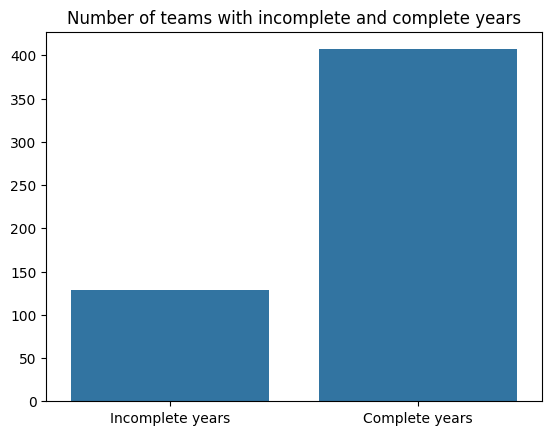

In [18]:
# Plotting obtained numbers
sns.barplot(x=["Incomplete years", "Complete years"], y=[teams_with_incomplete_years, teams_with_complete_years])
plt.title("Number of teams with incomplete and complete years")

We can find the absolute maximum among all teams for last 11 years. In football a team can obtain up to 3 points (3 for win and 1 for draw)

In [19]:
average_points_with_info_df.sort_values(by="AveragePoints", ascending=False).head(25)

,TeamID,Year,AveragePoints,Team_name,Country_Name
4225,69752,2014,3.00,Хегельманн,Литва
2741,11065,2014,3.00,Дечич,Черногория
5099,2925,2024,3.00,Лахти,Финляндия
5491,17959,2024,3.00,Витебск,Беларусь
4172,98841,2022,3.00,FK TransINVEST,Литва
3967,801,2024,3.00,Гётеборг,Швеция
4365,22783,2024,3.00,Нымме Калью,Эстония
4404,7130,2024,3.00,Нарва-Транс,Эстония
4413,8969,2020,3.00,Тиквеш,Северная Македония
5541,34429,2022,3.00,Фероникели 74,Косово


Now let us investigate most successful countries in terms of median and mean points per year

In [20]:
average_points_with_info_df\
    .groupby("Country_Name", as_index=False) \
    .agg(mean_average_points=("AveragePoints", "mean"),median_average_points=("AveragePoints", "median")) \
    .sort_values(by=["mean_average_points", "median_average_points"], ascending=False)

,Country_Name,mean_average_points,median_average_points
12,Гибралтар,1.953704,2.015
46,Фарерские острова,1.873962,1.930
55,Эстония,1.780548,1.870
49,Хорватия,1.767455,1.810
27,Люксембург,1.760816,1.745
30,Монако,1.746364,1.840
41,Словакия,1.720274,1.710
24,Латвия,1.693816,1.670
18,Исландия,1.693721,1.690
20,Италия,1.684380,1.690


A more elegant and however hard way to analyze the data

In [21]:
average_points_with_info_df.drop(["TeamID", "Year"], axis=1) \
    .groupby("Country_Name", as_index=False) \
    .describe()

Country_Name AveragePoints                                    \
                                 count      mean       std   min     25%   
0                Австрия          99.0  1.567475  0.387223  0.68  1.2550   
1            Азербайджан          87.0  1.394368  0.421820  0.55  1.0000   
2                Албания          90.0  1.541778  0.349432  0.53  1.3025   
3                 Англия         165.0  1.609455  0.419441  0.61  1.2600   
4                Андорра          61.0  1.646885  0.406504  0.32  1.5000   
5                Армения          82.0  1.491220  0.508798  0.37  1.1725   
6               Беларусь          98.0  1.678469  0.445873  0.75  1.3300   
7                Бельгия         119.0  1.567311  0.339406  0.77  1.3500   
8               Болгария         111.0  1.607477  0.368857  0.79  1.3300   
9   Босния и Герцеговина          97.0  1.636289  0.442910  0.11  1.3500   
10               Венгрия         126.0  1.584048  0.341880  0.94  1.3100   
11              Германия         176.0  1.539091  0.384149  0.59  1.2600   
12             Гибралтар          54.0  1.953704  0.429485  0.79  1.6850   
13                Греция         105.0  1.620857  0.411550  0.68  1.3000   
14                Грузия          90.0  1.524111  0.473241  0.29  1.1675   
15                 Дания         121.0  1.558512  0.380919  0.53  1.3200   
16               Израиль          99.0  1.544747  0.399758  0.35  1.2350   
17              Ирландия          76.0  1.637237  0.394548  0.78  1.3650   
18              Исландия          86.0  1.693721  0.372164  0.71  1.4550   
19               Испания         165.0  1.591636  0.398084  0.54  1.3000   
20                Италия         121.0  1.684380  0.343761  0.88  1.4700   
21             Казахстан          89.0  1.513034  0.425389  0.46  1.2400   
22                  Кипр          82.0  1.659756  0.306175  0.62  1.4725   
23                Косово          82.0  1.634390  0.428077  0.32  1.3725   
24                Латвия          76.0  1.693816  0.529425  0.37  1.3875   
25                 Литва          78.0  1.655000  0.554171  0.50  1.2450   
26           Лихтенштейн          11.0  1.371818  0.276073  0.97  1.1500   
27            Люксембург          98.0  1.760816  0.407726  0.53  1.4425   
28                Мальта         114.0  1.654737  0.425188  0.68  1.3125   
29               Молдова          67.0  1.512388  0.526740  0.50  1.1600   
30                Монако          11.0  1.746364  0.361394  0.92  1.6300   
31            Нидерланды         110.0  1.671727  0.424659  0.72  1.3150   
32              Норвегия         134.0  1.590970  0.380938  0.84  1.3125   
33                Польша         143.0  1.540420  0.309745  0.85  1.3150   
34            Португалия         121.0  1.632727  0.464387  0.59  1.2400   
35                Россия         117.0  1.569658  0.359938  0.81  1.2900   
36               Румыния         110.0  1.523182  0.381407  0.35  1.2825   
37            Сан-Марино          66.0  1.674697  0.555582  0.11  1.4000   
38     Северная Ирландия          96.0  1.667188  0.358420  0.84  1.3775   
39    Северная Македония          96.0  1.482500  0.499912  0.42  1.1975   
40                Сербия          95.0  1.653474  0.448614  0.39  1.3050   
41              Словакия          73.0  1.720274  0.336072  1.11  1.4600   
42              Словения          93.0  1.550323  0.394317  0.38  1.3000   
43                Турция         129.0  1.562636  0.403890  0.48  1.3100   
44               Украина         106.0  1.620189  0.441702  0.55  1.2725   
45                 Уэльс         125.0  1.636560  0.454171  0.34  1.3300   
46     Фарерские острова          53.0  1.873962  0.418350  0.50  1.6400   
47             Финляндия         118.0  1.551610  0.397612  0.21  1.3100   
48               Франция         154.0  1.546688  0.372610  0.52  1.3025   
49              Хорватия          55.0  1.767455  0.352137  0.83  1.5150   
50            Черногория         110.0  1.503818  0.407212  

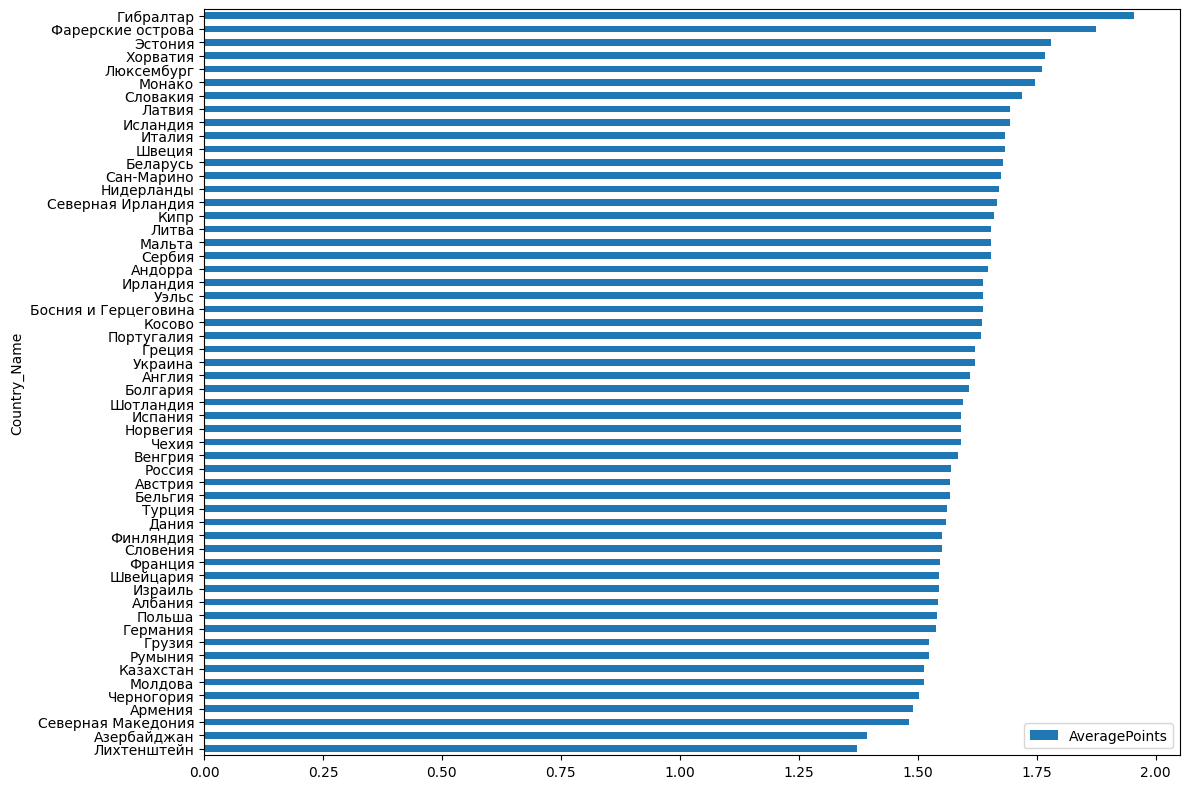

In [22]:
# Let us vusialize obtained findings for example for mean
plt.figure(figsize=(12, 8))
average_points_with_info_df.groupby("Country_Name", as_index=False).agg({"AveragePoints": "mean"})\
    .sort_values(by="AveragePoints", ascending=True).plot(x='Country_Name', y='AveragePoints', kind='barh', ax=plt.gca())
plt.tight_layout()

As we can see, countries like Germany or Spain are not leaders because we consider points in all competitions, and clubs from weak championships are likely to have more points

Since mean is sensitive to outlier, let us check median

In [23]:
# Sort Data Frame for putting it into JSON: we will store points year by year starting from 2014 and ending with 2025 if not missing some and advance team by team based on IDs
average_points_with_info_df = average_points_with_info_df.sort_values(by=["TeamID", "Year"])
average_points_with_info_df.head()

,TeamID,Year,AveragePoints,Team_name,Country_Name
2142,3,2014,1.24,Кёльн,Германия
2143,3,2015,1.28,Кёльн,Германия
2144,3,2016,1.49,Кёльн,Германия
2145,3,2017,0.79,Кёльн,Германия
2146,3,2018,1.83,Кёльн,Германия


In [24]:
# Retrieve data types
average_points_with_info_df.dtypes

TeamID             int64
Year               int64
AveragePoints    float64
Team_name         object
Country_Name      object
dtype: object

In [25]:
# Convert all types to string to put them into JSON
for column in average_points_with_info_df.columns:
    average_points_with_info_df[column] = average_points_with_info_df[column].astype(str)

In [26]:
# Create list of dictionaries that will be our JSON to move further on the project pipeline
teams_info_json = []

# Set attributes from the 1st row
current_team_id = average_points_with_info_df.iloc[0]["TeamID"]
current_team_name = average_points_with_info_df.iloc[0]["Team_name"]
current_team_points = []

# Iterate over rows
for row in average_points_with_info_df.itertuples():
    # Row[1] corresponds to TeamID, according to our Data Frame structure
    if row[1] != current_team_id:
        teams_info_json.append({
            "TeamID": current_team_id,
            "TeamName": current_team_name,
            "AveragePoints": current_team_points
        })
        # Reset attributes for the next team
        current_team_id = row[1]
        current_team_name = row[4]
        current_team_points = [row[3]]
        
    # Otherwise, just add points for this year
    else:
        current_team_points.append(row[3])
    

In [27]:
# Add the very last team
teams_info_json.append({
    "TeamID": current_team_id,
    "TeamName": row[4],
    "AveragePoints": current_team_points
})

In [28]:
# perform some checks
teams_info_json[0]

{'TeamID': '3',
 'TeamName': 'Кёльн',
 'AveragePoints': ['1.24',
  '1.28',
  '1.49',
  '0.79',
  '1.83',
  '1.08',
  '1.08',
  '1.57',
  '1.23',
  '0.83',
  '1.88']}

In [29]:
# The same data in the Data Frame
average_points_with_info_df[0:12]

,TeamID,Year,AveragePoints,Team_name,Country_Name
2142,3,2014,1.24,Кёльн,Германия
2143,3,2015,1.28,Кёльн,Германия
2144,3,2016,1.49,Кёльн,Германия
2145,3,2017,0.79,Кёльн,Германия
2146,3,2018,1.83,Кёльн,Германия
2147,3,2019,1.08,Кёльн,Германия
2148,3,2020,1.08,Кёльн,Германия
2150,3,2021,1.57,Кёльн,Германия
2151,3,2022,1.23,Кёльн,Германия
2152,3,2023,0.83,Кёльн,Германия


In [30]:
# Check the last team
teams_info_json[-1]

{'TeamID': '98841',
 'TeamName': 'FK TransINVEST',
 'AveragePoints': ['2.0', '3.0', '1.1']}

In [31]:
average_points_with_info_df[-5:]

,TeamID,Year,AveragePoints,Team_name,Country_Name
4459,80996,2023,1.62,Малишево,Косово
4464,80996,2024,1.7,Малишево,Косово
4188,98841,2021,2.0,FK TransINVEST,Литва
4172,98841,2022,3.0,FK TransINVEST,Литва
4175,98841,2023,1.1,FK TransINVEST,Литва


In [32]:
# Finally, write the JSON format data to the 

import json

with open("./average_points_per_team.json", "w") as file:
    json.dump(teams_info_json, file, indent=4)